In [176]:
import matplotlib.pyplot as plt
coords = [[1,2],[2,3],[3,5]]        #,[5,7],[6,7],[7,9],[9,17]
x = []
y = []

for i in coords: x.append(i[0]), y.append(i[1])

In [177]:
class Model:
    def __init__(self,crds):
        self.coords = crds

        self.m = (crds[-1][1] - crds[0][1])/(crds[-1][0] - crds[0][0])                          #(y2 - y1)/(x2 - x1)
        self.ml = self.m*1.5
        self.mr = self.m*0.5
        self.c = (crds[0][1]*crds[-1][0] - crds[-1][1]*crds[0][0])/(crds[-1][0] - crds[0][0])   #(y1*x2 - y2*x1)/(x2 - x1)
        self.cl = self.c*1.5
        self.cr = self.c*0.5
        self.err, self.yp = self._calcErr_(self.m,self.c)
    
    def __repr__(self):
        return f"m -> {self.m},({self.ml},{self.mr})\nc -> {self.c},({self.cl},{self.cr})\ncoords = {self.coords}\nyp = {self.yp}\nerror -> {self.err})\n"
    
    def _calcErr_(self,m,c):
        yp = []
        err = 0
        for i in range(len(coords)):
            yp.append(m*self.coords[i][0]+c)
            err += (yp[i] - self.coords[i][1])**2
        
        return err, yp
    
    def _method1_m_(self):
        el = self._calcErr_(self.ml,self.c)[0]
        er = self._calcErr_(self.mr,self.c)[0]

        #print(el, er)

        if el > er:
            self.ml = (self.ml + self.mr)/2
        else:
            self.mr = (self.ml + self.mr)/2
        
        self.m = (self.ml + self.mr)/2

    def _method1_c_(self):
        el = self._calcErr_(self.m,self.cl)[0]
        er = self._calcErr_(self.m,self.cr)[0]

        #print(el, er)

        if el > er:
            self.cl = (self.cl + self.cr)/2
        else:
            self.cr = (self.cl + self.cr)/2
        
        self.c = (self.cl + self.cr)/2
    

    def _plot_(self):
        x1 = self.coords[0][0] - 1
        x2 = self.coords[-1][0] + 1
        y1 = self.m*x1 + self.c
        y2 = self.m*x2 + self.c
        plt.scatter(x,y)
        plt.plot([x1,x2],[y1,y2])

    def _method2_m_(self,digit=1):
        x = 10**(-1*digit)
        e1 = self._calcErr_(self.m,self.c)[0]
        e2, y2 = self._calcErr_(self.m*(1+x),self.c)
        e3, y3 = self._calcErr_(self.m*(1-x),self.c)

        #print(e3, e1, e2)

        if e2 < e1:
            self.m *= (1+x)
            self.err = e2
            self.yp = y2
        if e3 < e1:
            self.m *= (1-x)
            self.err = e3
            self.yp = y3
        
        #print(self.m)
    
    def _method2_c_(self,digit=1):
        x = 10**(-1*digit)
        e1 = self._calcErr_(self.m,self.c)[0]
        e2, y2 = self._calcErr_(self.m,self.c*(1+x))
        e3, y3 = self._calcErr_(self.m,self.c*(1-x))

        #print(e3, e1, e2)

        if e2 < e1:
            self.c *= (1+x)
            self.err = e2
            self.yp = y2
        if e3 < e1:
            self.c *= (1-x)
            self.err = e3
            self.yp = y3

    def _fit_(self):
        for i in range(1,10):
            for j in range(0,20):
                self._method2_m_(i)
                self._method2_c_(i)
                # print("precision:",i)
                # print(self)


In [178]:
model1 = Model(coords)
model1

m -> 1.5,(2.25,0.75)
c -> 0.5,(0.75,0.25)
coords = [[1, 2], [2, 3], [3, 5]]
yp = [2.0, 3.5, 5.0]
error -> 0.25)

In [179]:
for i in range(0,50):
    model1._method1_c_()
    model1._method1_m_()
    model1.err, model1.yp = model1._calcErr_(model1.m,model1.c)
    model1

print(model1)

m -> 1.4414062499999993,(1.44140625,1.4414062499999987)
c -> 0.4687500000000002,(0.46875000000000044,0.46875)
coords = [[1, 2], [2, 3], [3, 5]]
yp = [1.9101562499999996, 3.351562499999999, 4.792968749999998]
error -> 0.17453002929687517)



In [180]:
x = [1,2,3]
y = [4,6,9]
coords1 = list(zip(x,y))

# coords1 =  [[1,4],[2,6],[3,9]]

model2 = Model(coords1)
model2._fit_()
model2

m -> 2.499285624876775,(3.75,1.25)
c -> 1.3350001989968072,(2.25,0.75)
coords = [(1, 4), (2, 6), (3, 9)]
yp = [3.834285823873582, 6.333571448750358, 8.832857073627133]
error -> 0.1666678574271555)

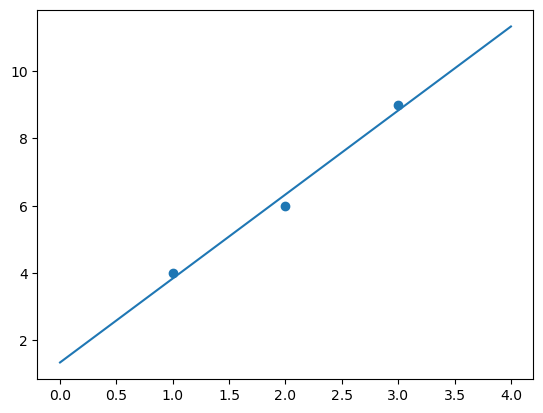

In [181]:
model2._plot_()

In [182]:
import numpy as np